<a href="https://colab.research.google.com/github/Andres2580/Complejidad-Algoritmica-Clases/blob/main/semana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #arreglos bidimensionales

In [21]:
%%file 1.txt
1 2 3 4 5 6 7 8 9
4 5 6 7 8 9 1 2 3
7 8 9 1 2 3 4 5 6
2 3 4 5 6 7 8 9 1
5 6 7 8 9 1 2 3 4
8 9 1 2 3 4 5 6 7
3 4 5 6 7 8 9 1 2
6 7 8 9 1 2 3 4 5
9 1 2 3 4 5 6 7 8


Overwriting 1.txt


In [22]:
#tablero
board = np.loadtxt("1.txt", dtype=int)
print(board)

[[1 2 3 4 5 6 7 8 9]
 [4 5 6 7 8 9 1 2 3]
 [7 8 9 1 2 3 4 5 6]
 [2 3 4 5 6 7 8 9 1]
 [5 6 7 8 9 1 2 3 4]
 [8 9 1 2 3 4 5 6 7]
 [3 4 5 6 7 8 9 1 2]
 [6 7 8 9 1 2 3 4 5]
 [9 1 2 3 4 5 6 7 8]]


Todas las filas de nuestro tablero estan bien
Del 1 al N sin repetir

In [9]:

def checkVec(vec):#linea
    n = len(vec)#determinar el tamaño de este vector
    count = [0]*n#luego verificar que todos los numeros en ese vector sean distintos / n -> cantidad de elemntos
    for e in vec:
        if count[e - 1] > 0:
            return False
        count[e - 1] += 1
    return True

def checkSudoku(board):
    n = len(board)
    for i in range(n):
        if not checkVec(board[i]): #verificamos cada fila de nuestro tablero la fila i
                return False
    return True

checkSudoku(board)

True

In [14]:
a = np.array([[1,2],[3,4]])
print(a)
print(a.reshape((4)))

[[1 2]
 [3 4]]
[1 2 3 4]


In [15]:

def checkVec(vec):
    n = len(vec)
    count = [0]*n
    for e in vec:
        if count[e - 1] > 0:
            return False
        count[e - 1] += 1
    return True

def checkSudoku(board):
    n = len(board)
    for i in range(n):
        if not (checkVec(board[i])
        and checkVec(board[:, i])):#las columnas / quiero coger solamente la columna i
            return False
    m = int(n**0.5)#la raiz cuadrada
    for f in range(m):
        for c in range(m):
            print(board[f*m:(f+1)*m, c*m:(c+1)*m])
    return True
checkSudoku(board)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[4 5 6]
 [7 8 9]
 [1 2 3]]
[[7 8 9]
 [1 2 3]
 [4 5 6]]
[[2 3 4]
 [5 6 7]
 [8 9 1]]
[[5 6 7]
 [8 9 1]
 [2 3 4]]
[[8 9 1]
 [2 3 4]
 [5 6 7]]
[[3 4 5]
 [6 7 8]
 [9 1 2]]
[[6 7 8]
 [9 1 2]
 [3 4 5]]
[[9 1 2]
 [3 4 5]
 [6 7 8]]


True

In [16]:

def checkVec(vec):
    n = len(vec)
    count = [0]*n
    for e in vec:
        if count[e - 1] > 0:
            return False
        count[e - 1] += 1
    return True

def checkSudoku(board):
    n = len(board)
    for i in range(n):
        if not (checkVec(board[i]) and checkVec(board[:, i])):
            return False
    m = int(n**0.5)
    for f in range(m):
        for c in range(m):
            if not checkVec(board[f*m:(f+1)*m, c*m:(c+1)*m].reshape((n))):
                return False
    return True

In [23]:
checkSudoku(board)

True

BACKTRACKING


In [24]:
import matplotlib.pyplot as plt #graficar el tablero
import numpy as np

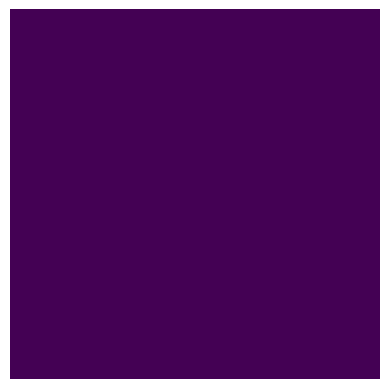

In [28]:
def showBoard(board: list):
    n = len(board)#numero de filas que tiene este tablero
    b = np.zeros((n, n), dtype=int)#matriz nxn
    plt.imshow(b)
    plt.axis("off")#

showBoard([1, 3, 0, 2])

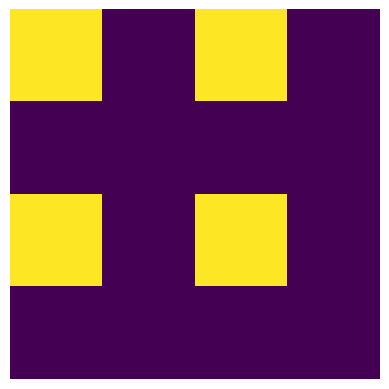

In [30]:
def showBoard(board: list):
    n = len(board)#numero de filas que tiene este tablero
    b = np.zeros((n, n), dtype=int)#matriz nxn
    #b[:,3] = 1#para todas las filas(:,) en la columna 3 quiero q haya 1s
    b[::2,::2] = 1
    plt.imshow(b)
    plt.axis("off")

showBoard([1, 3, 0, 2])

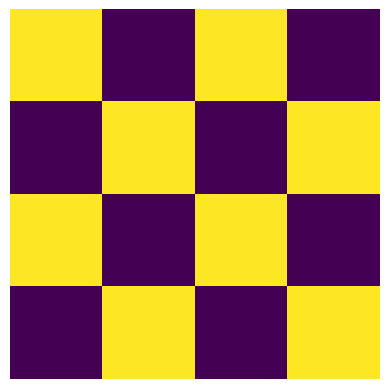

In [31]:
def showBoard(board: list):
    n = len(board)#numero de filas que tiene este tablero
    b = np.zeros((n, n), dtype=int)#matriz nxn
    b[::2,::2] = 1
    b[1::2, 1::2] = 1
    plt.imshow(b)
    plt.axis("off")

showBoard([1, 3, 0, 2])

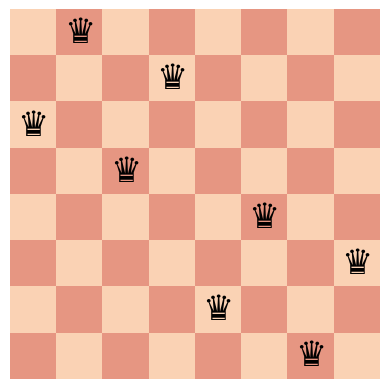

In [50]:
def showBoard(board: list):
    n = len(board)  #3->rgb nxnx3
    b = np.zeros((n, n, 3), dtype=int)
    b[:, :] = [230, 150, 130]
    b[::2, ::2] = [250, 210, 180]
    b[1::2, 1::2] = [250, 210, 180]
    plt.imshow(b)
    for row, col in enumerate(board):#la fil y la col le saco del tablero
        if col != -1:
            plt.text(col, row, u"\u265B", size=200/n, ha='center', va='center')
    plt.axis("off")
    plt.show()#recomendable

showBoard([1, 3, 0, 2, 5, 7, 4, 6])#tablero mas grande